In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
adata = sc.read_h5ad('write/221213_mouse_kidney_processing.h5ad')  

In [4]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:11)


In [6]:
sc.tl.umap(adata)

In [22]:
sc.tl.leiden(adata, resolution = 0.15, key_added = "leiden_0.15")

running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.15', the cluster labels (adata.obs, categorical) (0:00:03)


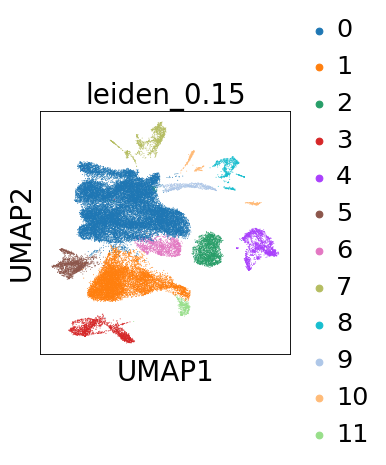

In [23]:
sc.set_figure_params(scanpy=True,fontsize=25)
sc.pl.umap(adata, color='leiden_0.15')

In [19]:
marker_genes= {
    'Endo':['Nrp1'],
    'Podo':['Nphs1'],
    'PT':['Lrp2'],
    'DCT':['Slc12a1'],
    'CD-PC':['Pvalb'],
    'CD-IC':['Aqp2'],
    'CD-Trans':['Atp6v0d2'],
    'Novel1':['Insrr'],
    'Fib':['Cdca3'],
    'Macro':['Plac8'],
    'Neutro':['C1qb'],
    'B lymph':['S100a8'],
    'T lymph':['Cd79b'],
    'NK':['Gzma']
}

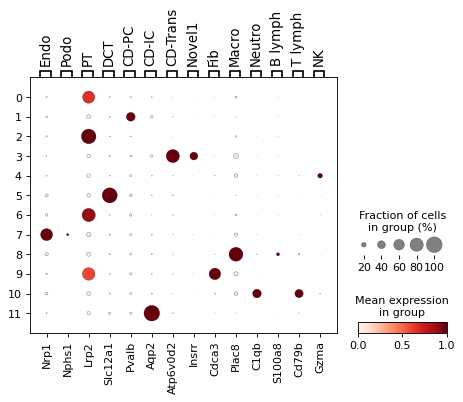

In [24]:
sc.set_figure_params(scanpy=True, fontsize=12)
sc.pl.dotplot(adata,marker_genes,'leiden_0.15',dendrogram=False,standard_scale='var')

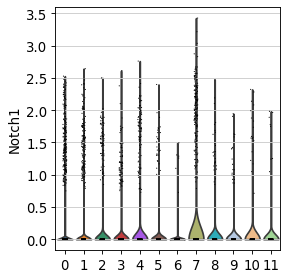

In [25]:
sc.set_figure_params(scanpy=True, fontsize=12)
sc.pl.violin(adata, ['Notch1'], groupby='leiden_0.15', rotation = 0)

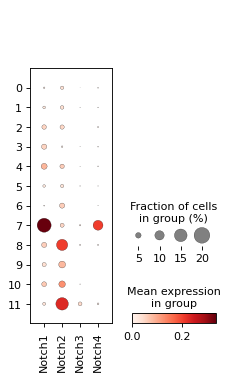

In [33]:
sc.set_figure_params(scanpy=True, fontsize=12)
sc.pl.dotplot(adata,['Notch1','Notch2','Notch3','Notch4'],'leiden_0.15',dendrogram=False)

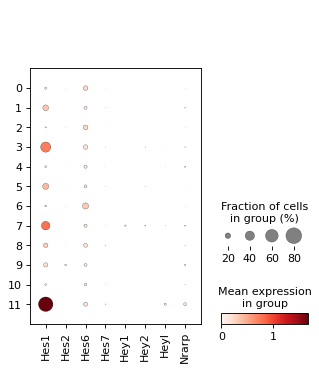

In [43]:
sc.set_figure_params(scanpy=True, fontsize=12)
sc.pl.dotplot(adata,['Hes1','Hes2','Hes6','Hes7','Hey1','Hey2','Heyl','Nrarp'],'leiden_0.15',dendrogram=False)

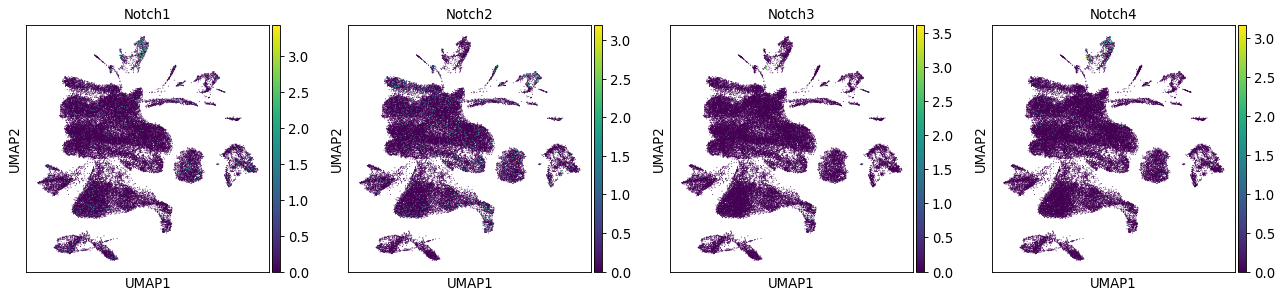

In [32]:
sc.pl.umap(adata, color=['Notch1','Notch2','Notch3','Notch4'])

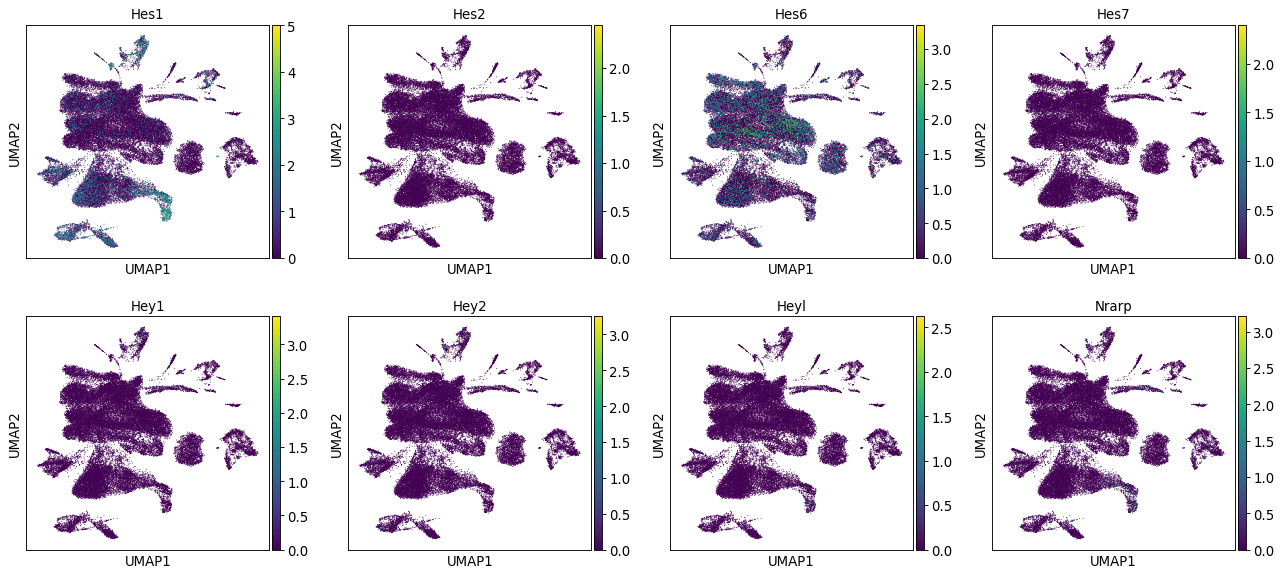

In [42]:
sc.pl.umap(adata, color=['Hes1','Hes2','Hes6','Hes7','Hey1','Hey2','Heyl','Nrarp'])